In [43]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
df.shape #To get the shape of data

(50000, 2)

In [46]:
df.info() #for getting the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [47]:
df.describe() #gettings insights about data

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [48]:
df['sentiment'].unique() #finding unique sentiments


array(['positive', 'negative'], dtype=object)

In [49]:
#mapping the sentiment values to 1's and 0's

df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [50]:
#making the reviews in lower case

df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [51]:
df['review'].iloc[1]


'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [52]:
from bs4 import BeautifulSoup

# removing HTML tags using BeautifulSoup
df['review'] = df['review'].apply(lambda x: BeautifulSoup(str(x), "html.parser").get_text())
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [53]:
df['review'].iloc[1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [54]:
#removing unwanted characters

df['review'] = df['review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [55]:
df['review'].iloc[1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [56]:
#doing tokenization

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the cleaned text
df['review'] = df['review'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, theres, a, family, where, a, littl...",0
4,"[petter, matteis, love, in, the, time, of, mon...",1


In [19]:
#removing stopwords

from nltk.corpus import stopwords

nltk.download('stopwords')

# Define the set of stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    # Remove stop words from the token list
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply stop words removal to the tokenized text
df['review'] = df['review'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, theres, family, little, boy, jake,...",0
4,"[petter, matteis, love, time, money, visually,...",1


In [20]:
#Lemmatization

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Apply lemmatization
df['review'] = df['review'].apply(lemmatize_words)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tomar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, there, family, little, boy, jake, ...",0
4,"[petter, matteis, love, time, money, visually,...",1


In [21]:
df['review'] = df['review'].apply(lambda x: ' '.join(x))
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


In [22]:
#Text-to-feature vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 1)
X = vectorizer.fit_transform(df['review'])

print(X[0])

  (0, 1569)	0.07910013644623011
  (0, 1799)	0.09190120345950316
  (0, 151)	0.07690435592713653
  (0, 1102)	0.06309043014503518
  (0, 600)	0.08012544229656715
  (0, 1589)	0.10108405376877011
  (0, 1672)	0.08897023145325786
  (0, 986)	0.07778602857690113
  (0, 1832)	0.08535291149915607
  (0, 303)	0.08943617148948581
  (0, 1123)	0.08831185327480148
  (0, 1924)	0.04475790848421435
  (0, 124)	0.06562223502777952
  (0, 747)	0.0824214550712311
  (0, 1239)	0.08339382670858411
  (0, 972)	0.07651111395106869
  (0, 784)	0.11480726364130799
  (0, 775)	0.10343336119832926
  (0, 1023)	0.0827350995611823
  (0, 769)	0.06042282996636425
  (0, 1732)	0.09665704804056979
  (0, 457)	0.10314175967927738
  (0, 1912)	0.06865155706045596
  (0, 1402)	0.10421267517979226
  (0, 373)	0.07560000407184057
  :	:
  (0, 754)	0.07332742378586574
  (0, 234)	0.07886655618351579
  (0, 1863)	0.07325896569245993
  (0, 304)	0.07187442507034902
  (0, 1543)	0.07909174573696301
  (0, 514)	0.09357772041956781
  (0, 1369)	0.094913

In [23]:
#split the data into train and test

from sklearn.model_selection import train_test_split

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Creating an instance of Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Making predictions
nb_y_pred = nb_model.predict(X_test)

# Checking score
nb_accuracy = accuracy_score(y_test, nb_y_pred)

# Printing Classification Report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6157
           1       0.84      0.85      0.85      6343

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



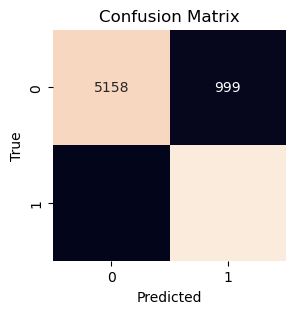

In [41]:
#confusion matrix
cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
cm

array([[5158,  999],
       [ 945, 5398]], dtype=int64)

In [28]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [32]:
#designing the sentimenter
def pre_process(review):
    review = review.lower()
    review = re.sub(r'[^\w\s]', '', review)
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.split()
    stop_words = set(stopwords.words('english'))
    review = [word for word in review if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    return review

In [33]:
#predicting the sentiment
def predict(review):
    review = pre_process(review)
    review_vector = vectorizer.transform([review])  
    y_pred = nb_model.predict(review_vector)
    if y_pred == 1:
        return 'Good 👍'
    else:
        return 'Bad 👎'

In [34]:
# Sample movie reviews
reviews = [
    "The latest sci-fi blockbuster delivers stunning visuals and a compelling story. \nThe character development was on point, and I loved every minute of it. Definitely \nworth the watch!",
    
    "This movie was a complete waste of time. The plot was nonsensical, and the acting \nwas wooden. I can't believe I sat through the whole thing.",
    
    "The film explores deep themes of love and loss, with powerful performances that \nhad me in tears. A must-see for fans of drama and romance.",
    
    "This movie is the best I've seen this year! The storyline is so gripping, and the \nperformances are top-notch. Click here to get your exclusive behind-the-scenes access!",
    
    "You won't believe the twist ending in this thriller! The suspense will keep you on \nthe edge of your seat. Watch now and experience the surprise that everyone's talking about!!!",
    
    "The special effects were laughably bad, and the script was full of clichés. I expected \nmuch more from this director, but it was a huge letdown.",
    
    "A heartwarming tale that captures the essence of friendship and adventure. The humor is \nspot on, and the characters are so relatable. Perfect for a weekend movie night!",
    
    "I couldn't even finish the movie. The pacing was so slow, and the dialogue was cringeworthy. \nSave your time and skip this one."
]

# Predict if each review is spam or ham
for review in reviews:
    prediction = predict(review)
    print(f"Review: \"{review}\"\n\nSentiment Analysed: {prediction}")
    print('--------------------------------------------------------------------------------------------------------\n')

Review: "The latest sci-fi blockbuster delivers stunning visuals and a compelling story. 
The character development was on point, and I loved every minute of it. Definitely 
worth the watch!"

Sentiment Analysed: Good 👍
--------------------------------------------------------------------------------------------------------

Review: "This movie was a complete waste of time. The plot was nonsensical, and the acting 
was wooden. I can't believe I sat through the whole thing."

Sentiment Analysed: Bad 👎
--------------------------------------------------------------------------------------------------------

Review: "The film explores deep themes of love and loss, with powerful performances that 
had me in tears. A must-see for fans of drama and romance."

Sentiment Analysed: Good 👍
--------------------------------------------------------------------------------------------------------

Review: "This movie is the best I've seen this year! The storyline is so gripping, and the 
performances 